In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.gridspec import GridSpec


In [30]:
# -- load the data -- 
std= pd.read_excel(r'/Users/Rushaner/Desktop/Proyecto/Copy of modelo_tidy_estudiantes_actualizado.xlsx', index_col= None)
std.head(20)

# -- tranform the data nota from a range of 100 to a range of 10 -- 
std['nota']= std['nota']/10

std[std['area'] == "Historia"]

,id_estudiante,nombre_estudiante,area,asignatura,aula 1,nota,fecha
6,1,Ana Pérez,Historia,Historia Universal,Aula 1,8.0,2025-09-01
7,1,Ana Pérez,Historia,Historia Nacional,Aula 1,8.3,2025-09-01


In [20]:
def segmentacion(df,name,cat, nt, col_name):
    """Esta funcion calcula y ajusta, el angulo y la posicion 
    donde se colocaran en el grafico
    #df- DataFrame
    # name(str) - nombre del estudiante 
    # cat (str) - columan de las categoria que evaluara en el grafico
    # nt (str)- columna donde se encuentra las notas(float) o parametro evaluativo
    # col_name (str)- columna que donde se encuentra los nombres"""

    
    # selecting and lenning the unique values from the column cat;
    skill_ct= list(df[cat].unique())
    l_skill_ct = len(skill_ct)
    
    #filter the data frame by the name of the student
    df1= df[(df[col_name] == name)]
    df1= df1.groupby( [col_name ,cat], as_index= False)[nt].mean().round(1)
    
    #listing the grade 
    nota = list(df1[nt])
    
    #compute the angles 
    
    angle= np.linspace(0,2 *np.pi, l_skill_ct, endpoint= False).tolist()
    nota += nota[:1]
    angle += angle[:1]
    
        # check the variables 
    if len(nota) == 0 or len(angle) == 0:
        print("Error: nota o angle están vacíos")
        print(nota,angle )
    else:
        # exective if all of them have values
        while len(nota) != len(angle):
            if len(angle) > len(nota):
                nota += nota[:1]
            elif len(nota) > len(angle):
                nota = nota[:len(angle)]
            
    return angle, nota, skill_ct

In [23]:
def student_grade_chat(df,name,grade, cl_name, cat, asg, aula ):
    
    """Esta funcion crea la platilla y el grafico principal por area
    y los sub grafico por campos
    #df- DataFrame
    # name(str) - nombre del estudiante 
    # cat (str) - columan de las categoria que evaluara en el grafico
    # grande (str)- columna donde se encuentra las notas(float) o parametro evaluativo
    # col_name (str)- columna que donde se encuentra los nombres
    # asg (str)- columna de la sub areas, 
    # aula(str)- columna del aula que esta evaluando"""

    # Selecting and counting the unique values from the column 'area'
    skill_ct = list(df[cat].unique())
    l_skill_ct = len(skill_ct)

    # Filter the dataframe by the student's name
    df1 = df[(df[cl_name] == name) & (df['aula 1 '] == aula)]
    df1 = df1.groupby([cl_name, cat], as_index=False)[ grade].mean().round(1)

    # Listing the grades
    nota = list(df1[grade])

    # Compute the angles
    angle = np.linspace(0, 2 * np.pi, l_skill_ct, endpoint=False).tolist()

    # Close the circle
    nota += nota[:1]
    angle += angle[:1]

    # Adjust lengths in case they differ
    while len(nota) != len(angle):
        if len(angle) > len(nota):
            nota += nota[:1]  # close the angle
        elif len(nota) > len(angle):
            nota = nota[:len(angle)]

    # Set the style of the chat
    plt.style.use("ggplot")
    
    fig = plt.figure( figsize= (20,12)) # Create the figure where all the grafic will be layout 

    #Select the part of the fig, it's worked as a arrays
    fig_g= GridSpec(4,6, figure= fig)
    ax1= fig.add_subplot(fig_g[1:3, 2:4], polar= True)
    ax2= fig.add_subplot(fig_g[1,0],polar= True)
    ax3= fig.add_subplot(fig_g[2,1],polar= True)
    ax4= fig.add_subplot(fig_g[3,0],polar= True)
    ax5= fig.add_subplot(fig_g[1,5],polar= True)
    ax6= fig.add_subplot(fig_g[2,4],polar= True)
    ax7= fig.add_subplot(fig_g[3,5],polar= True)

    #Plot the first chat and the principal 
    ax1.plot(angle, nota, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
    ax1.fill(angle, nota, color= 'orange', alpha= 0.2)
        
        #set the ticks labes 
    ax1.set_yticks(range(1,11))
    ax1.set_yticklabels([])
    ax1.set_xticks(angle[:-1])
    ax1.set_xticklabels(skill_ct, fontsize= 8)
    ax1.tick_params(axis='x', pad=8)
    ax1.set_title (f'Estudiante {name} del {aula}', pad= 25, fontsize= 16)

    #Filter the df by one of the area
    df2= df[df['area']== "Historia"]
    
    #Check if the values name is in df 
    if name is df2[cl_name].values:
        angle_2, nota_2, skill_as2 = segmentacion(df2, name= name ,
                                         cat= asg ,
                                         col_name= cl_name,
                                         nt= grade 
                                         ) #this function return the values to compute the data
        
        #Plot the chat 
        ax2.plot(angle_2, nota_2, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax2.fill(angle_2, nota_2, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax2.set_yticks(range(1,11))
        ax2.set_yticklabels([])
        ax2.set_xticks(angle_2[:-1])
        ax2.set_xticklabels(skill_as2, rotation= 45)
        ax2.tick_params(axis='x', pad=8)
        ax2.set_title (f'Campo de Historia', pad= 25)
    else: 
        ax2.set_title (f'Campo de Historia', pad= 25)
        pass #jump to the othe line of code if the name is not on df 


    df3= df[df['area'] == "Matemáticas"]
    #Check if the values name is in df 
    if name is df2[cl_name].values:
        angle_3, nota_3, skill_as3= segmentacion(df3, name= "Ana Pérez",
                                        cat= 'asignatura',
                                        col_name= 'nombre_estudiante',
                                        nt= 'nota'
                                        )
        ax3.plot(angle_3, nota_3, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax3.fill(angle_3, nota_3, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax3.set_yticks(range(1,11))
        ax3.set_yticklabels([])
        ax3.set_xticks(angle_3[:-1])
        ax3.set_xticklabels(skill_as3)
        ax3.tick_params(axis='x', pad=8)
        ax3.set_title (f'Campo de Matematicas', pad= 35)
    else:
        ax3.set_title(f'Campo de Matematicas', pad= 35)
        pass

    #Filte the dataframe
    df4= df[df['area'] == "Ciencias"]

    if name is df2[cl_name].values:
        #Get the variable from the seg function 
        angle_4, nota_4, skill_as4= segmentacion(df4, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        nt= grade
                                        )
        #set the plot 
        ax4.plot(angle_4, nota_4, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax4.fill(angle_4, nota_4, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax4.set_yticks(range(1,11))
        ax4.set_yticklabels([])
        ax4.set_xticks(angle_4[:-1])
        ax4.set_xticklabels(skill_as4)
        ax4.tick_params(axis='x', pad=8)
        ax4.set_title (f'Campo de Ciencias', pad= 35)
    else: 
        ax4.set_title (f'Campo de Ciencias', pad= 35)
        pass

    #filter the dataframe
    df5= df[df['area'] == "Tecnología"]

    if name in df5[cl_name].values:

        angle_5, nota_5, skill_as5 = segmentacion(df5, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        nt= grade
                                        )
        ax5.plot(angle_5, nota_5, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax5.fill(angle_5, nota_5, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax5.set_yticks(range(1,11))
        ax5.set_yticklabels([])
        ax5.set_xticks(angle_5[:-1])
        ax5.set_xticklabels(skill_as5)
        ax5.tick_params(axis='x', pad=8)
        ax5.set_title (f'Campo de Tecnologia', pad= 35)
    else:
        pass

    #filter the dataframe
    df6= df[df['area'] == "Lenguas"]

    #check if the name of the student is in the df
    if name in df6[cl_name].values:

        angle_6, nota_6, skill_as6 = segmentacion(df6, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        nt= grade
                                        )
        ax6.plot(angle_6, nota_6, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax6.fill(angle_6, nota_6, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax6.set_yticks(range(1,11))
        ax6.set_yticklabels([])
        ax6.set_xticks(angle_6[:-1])
        ax6.set_xticklabels(skill_as6)
        ax6.tick_params(axis='x', pad=8)
        ax6.set_title (f'Campo de Lenguas', pad= 15)
    else:
        pass

    #filter the dataframe 
    df7= df[df['area'] == "Educación Fisica"]

    #check if the name of the student is in the df
    if name in df6[cl_name].values:

        angle_7, nota_7, skill_as7 = segmentacion(df7, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        nt= grade
                                        )
        ax7.plot(angle_7, nota_7, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax7.fill(angle_7, nota_7, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax7.set_yticks(range(1,11))
        ax7.set_yticklabels([])
        ax7.set_xticks(angle_7[:-1])
        ax7.set_xticklabels(skill_as7)
        ax7.tick_params(axis='x', pad=8)
        ax7.set_title (f'Campo de Educación Fisica', pad= 15)
    else:
        ax7.set_title (f'Campo de Educación Fisica', pad= 15)
        pass
    
    return ax1, ax2, ax3, ax4, ax5, ax6, ax7

Error: nota o angle están vacíos
[] []


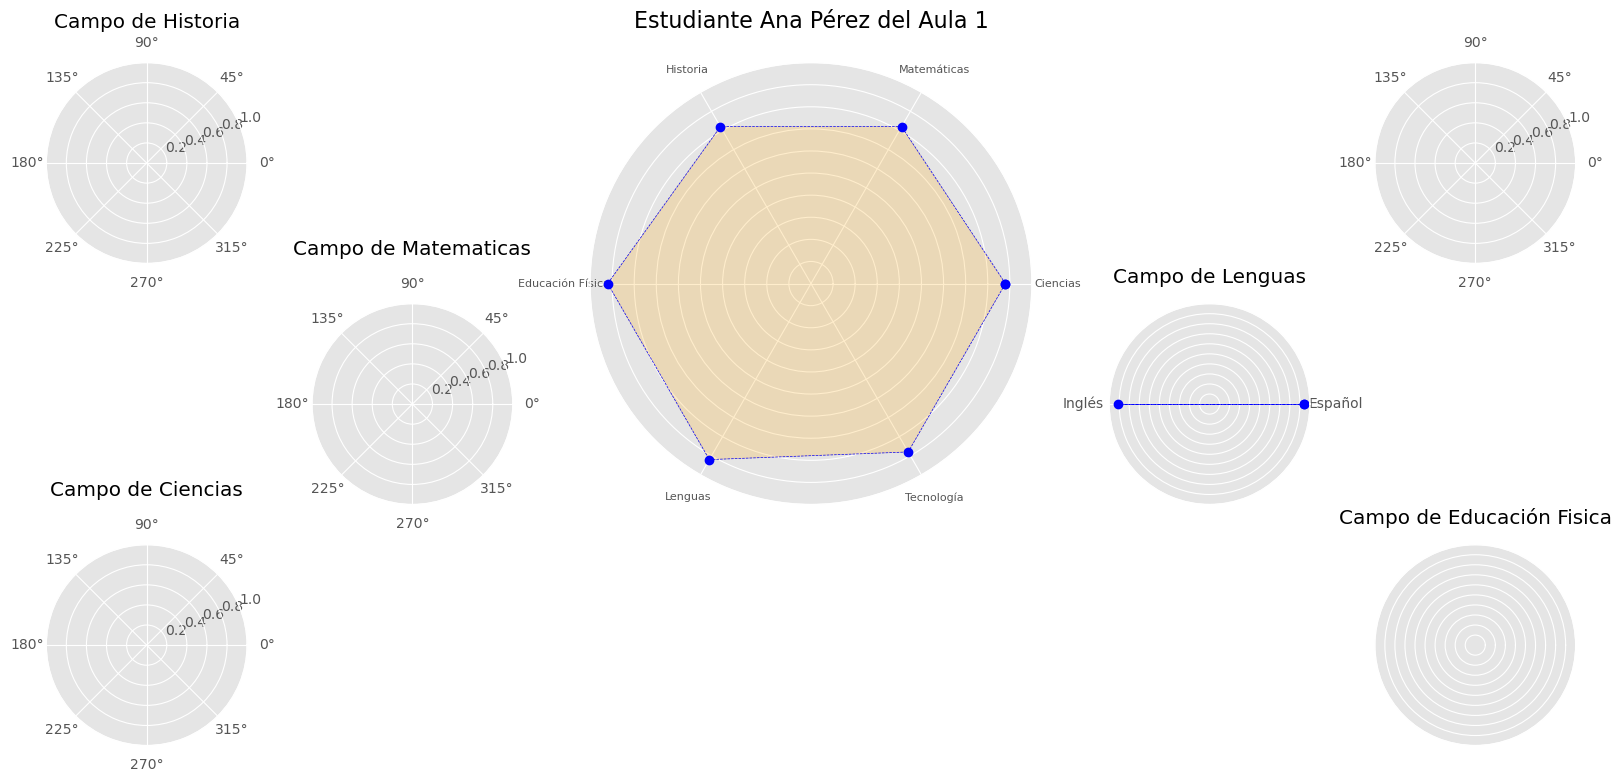

In [31]:
student_grade_chat(std, 'Ana Pérez', grade= 'nota', cl_name= 'nombre_estudiante',
                       cat= 'area',
                       asg= 'asignatura', aula= 'Aula 1')
plt.show()

In [22]:
dfr = std[std['area']== "Matemáticas"]

w, e, f= segmentacion(dfr, name= 'Ana Pérez', cat= 'asignatura', nt= 'nota', col_name= 'nombre_estudiante')
print(w)
print(e)
print(f)

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]
[8.9, 9.2, 9.5, 8.9, 8.9]
['Álgebra', 'Geometría', 'Cálculo', 'Estadística']
